
 RTOS Averages: [array([ 25.4, 270.6, 111.7, 407.6]), array([ 23.6, 613.3, 168.9, 805.3]), array([  24.7,  764.5,  477.5, 1266.5])] 



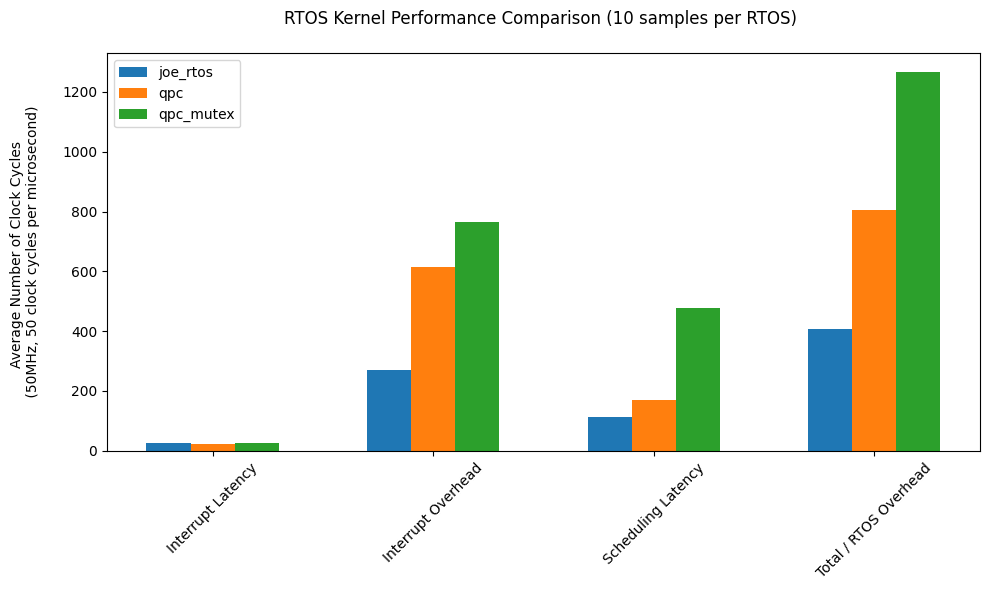

In [2]:
# %pip install matplotlib
# %pip install pandas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#####  Process RTOS Data

# File names
file_names = ['miros.csv', 'qpc.csv', 'qpc_mutex.csv']

# Column names for data columns
data_cols = ['int_lat', 'int_over', 'sched', 'total']

# Read data from CSV files and calculate averages
data = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    averages = df[data_cols].mean().values
    data.append(averages)

print(f'\n RTOS Averages: {data} \n')


#####  Make Grouped Bar Chart

# Set up the plot
categories = ['Interrupt Latency', 'Interrupt Overhead', 'Scheduling Latency', 'Total / RTOS Overhead']
num_rtos = len(file_names)
bar_width = 0.2
index = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
for i in range(num_rtos):
    offset = i - num_rtos / 2 + 0.5
    ax.bar(index + offset * bar_width, data[i], bar_width, label=f'{file_names[i][:-4]}' if file_names[i] != 'miros.csv' else 'joe_rtos')

# Set the x-ticks and labels
plt.xticks(index, categories)

# Set the x and y-axis labels
# plt.xlabel('Categories')
plt.ylabel('Average Number of Clock Cycles \n (50MHz, 50 clock cycles per microsecond) \n')

# Add a legend
plt.legend(loc='best')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title
plt.title('RTOS Kernel Performance Comparison (10 samples per RTOS) \n')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


 RTOS Averages: [array([ 25.4, 270.6, 111.7]), array([ 23.6, 613.3, 168.9]), array([ 24.7, 764.5, 477.5])] 



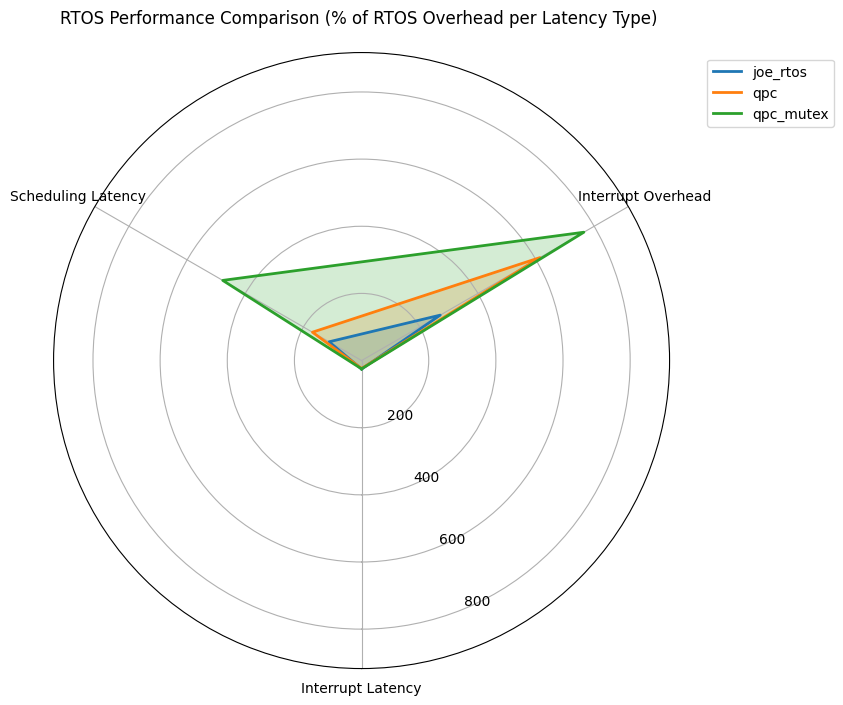

In [3]:
#####  Process RTOS Data

# File names
file_names = ['miros.csv', 'qpc.csv', 'qpc_mutex.csv']

# Column names for data columns
# leave out the Total/RTOS Overhead for this graph (the last col)
data_cols = ['int_lat', 'int_over', 'sched']

# Read data from CSV files and calculate averages
data = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    averages = df[data_cols].mean().values
    data.append(averages)

print(f'\n RTOS Averages: {data} \n')



#####  Make Spider Chart

# Convert data to numpy array
data = np.array(data)

# Calculate the angle for each column (there will be N columns)
N = len(data_cols)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Repeat the first angle to close the radar chart

# Set up the subplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Draw the radar chart
ax.set_theta_offset(3*np.pi / 2)  # Rotate the chart by 90 degrees
ax.set_ylim(0, np.max(data) * 1.2)  # Adjust the y-axis limit
for i, rtos_data in enumerate(data):
    values = np.concatenate((rtos_data, [rtos_data[0]]))  # Repeat the first value to close the radar chart
    label=f'{file_names[i][:-4]}' if file_names[i] != 'miros.csv' else 'joe_rtos'
    ax.plot(angles, values, label=label, linewidth=2)
    ax.fill(angles, values, alpha=0.2)  # Fill the area under the curve

# Add labels for each data column
ax.set_xticks(angles[:-1])
ax.set_xticklabels(["Interrupt Latency", "Interrupt Overhead", "Scheduling Latency"])

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a title
plt.title('RTOS Performance Comparison (% of RTOS Overhead per Latency Type) \n')

# Display the plot
plt.show()


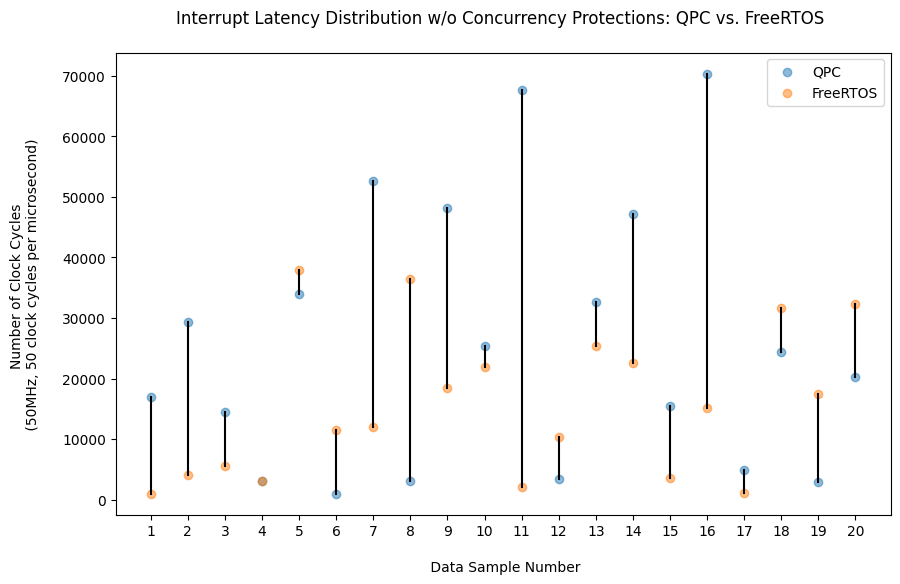

In [19]:

#### Interrupt Latency Scatterplot: QPC vs. FreeRTOS

# Read data from CSV files
qpc_data = pd.read_csv('qpc_sema.csv')
freertos_data = pd.read_csv('freertos_sema.csv')


# Extract the interrupt latency values
qpc_latency = qpc_data['int_lat']
freertos_latency = freertos_data['int_lat']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for QPC
qpc_points = ax.scatter(range(1, len(qpc_latency) + 1), qpc_latency, alpha=0.5, label='QPC Sema')

# Plot the scatter points for FreeRTOS
freertos_points = ax.scatter(range(1, len(freertos_latency) + 1), freertos_latency, alpha=0.5, label='FreeRTOS Sema')

# Add vertical lines between the data points
for i in range(len(qpc_latency)):
    x = i + 1
    y1 = qpc_latency[i]
    y2 = freertos_latency[i]
    ax.plot([x, x], [y1, y2], 'k-')

# Set the x and y-axis labels
ax.set_xlabel('\n Data Sample Number')
ax.set_ylabel('Number of Clock Cycles \n (50MHz, 50 clock cycles per microsecond) \n')

# Set the x-axis tick labels
ax.set_xticks(range(1, max(len(qpc_latency), len(freertos_latency)) + 1))

# Add a legend
ax.legend()

# Add a title
ax.set_title('Interrupt Latency Distribution w/o Concurrency Protections: QPC vs. FreeRTOS \n')

# Display the plot
plt.show()

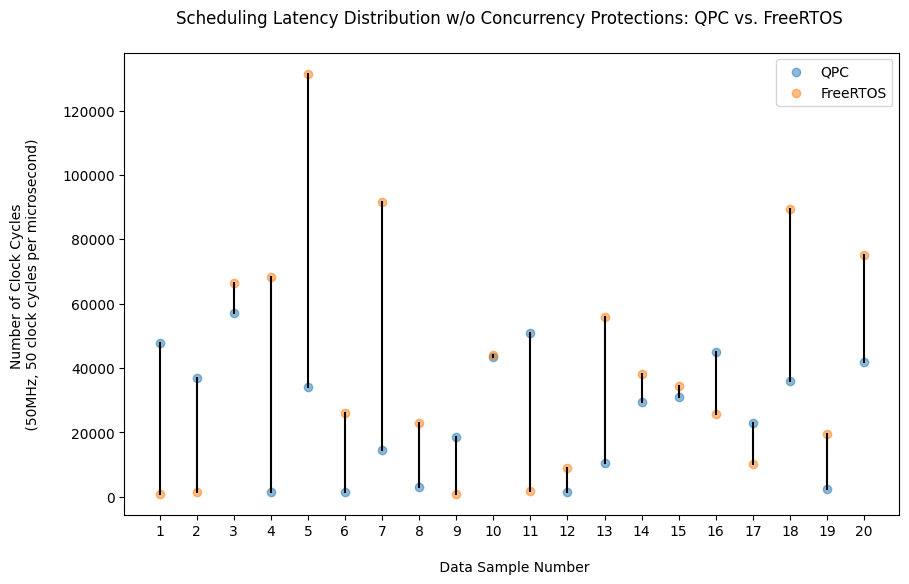

In [22]:

#### Scheduling Latency Scatterplot: QPC vs. FreeRTOS

# Read data from CSV files
qpc_data = pd.read_csv('qpc_sema.csv')
freertos_data = pd.read_csv('freertos_sema.csv')


# Extract the interrupt latency values
qpc_latency = qpc_data['sched']
freertos_latency = freertos_data['sched']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for QPC
qpc_points = ax.scatter(range(1, len(qpc_latency) + 1), qpc_latency, alpha=0.5, label='QPC Sema')

# Plot the scatter points for FreeRTOS
freertos_points = ax.scatter(range(1, len(freertos_latency) + 1), freertos_latency, alpha=0.5, label='FreeRTOS Sema')

# Add vertical lines between the data points
for i in range(len(qpc_latency)):
    x = i + 1
    y1 = qpc_latency[i]
    y2 = freertos_latency[i]
    ax.plot([x, x], [y1, y2], 'k-')

# Set the x and y-axis labels
ax.set_xlabel('\n Data Sample Number')
ax.set_ylabel('Number of Clock Cycles \n (50MHz, 50 clock cycles per microsecond) \n')

# Set the x-axis tick labels
ax.set_xticks(range(1, max(len(qpc_latency), len(freertos_latency)) + 1))

# Add a legend
ax.legend()

# Add a title
ax.set_title('Scheduling Latency Distribution w/o Concurrency Protections: QPC vs. FreeRTOS \n')

# Display the plot
plt.show()

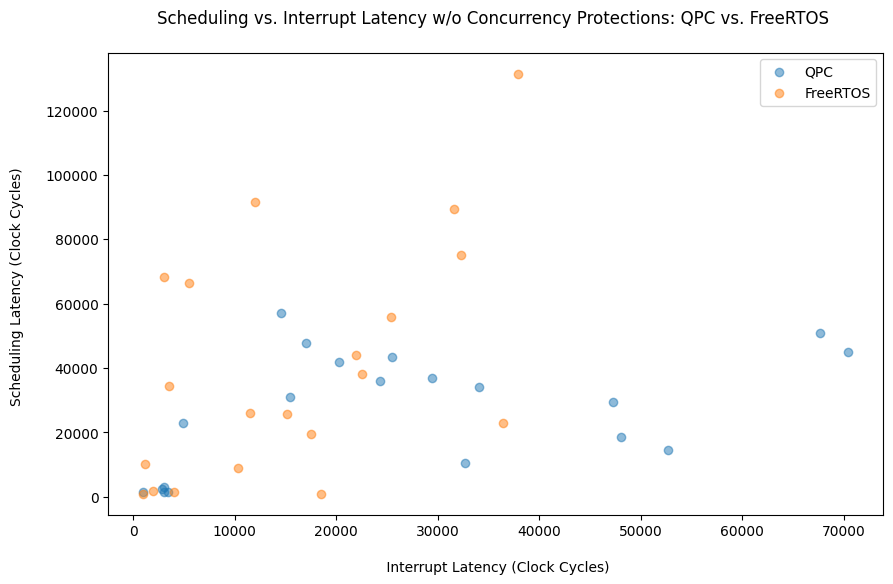

In [27]:

#### Interrupt Latency vs. Scheduling Latency: QPC vs. FreeRTOS


# Read data from CSV files
qpc_data = pd.read_csv('qpc_sema.csv')
freertos_data = pd.read_csv('freertos_sema.csv')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for QPC
qpc_scatter = ax.scatter(qpc_data['int_lat'], qpc_data['sched'], alpha=0.5, label='QPC Sema')

# Plot the scatter points for FreeRTOS
freertos_scatter = ax.scatter(freertos_data['int_lat'], freertos_data['sched'], alpha=0.5, label='FreeRTOS Sema')

# Set the x and y-axis labels
ax.set_xlabel('\n Interrupt Latency (Clock Cycles)')
ax.set_ylabel('Scheduling Latency (Clock Cycles) \n')

# Add a legend
ax.legend()

# Add a title
ax.set_title('Scheduling vs. Interrupt Latency w/o Concurrency Protections: QPC vs. FreeRTOS \n')

# Display the plot
plt.show()

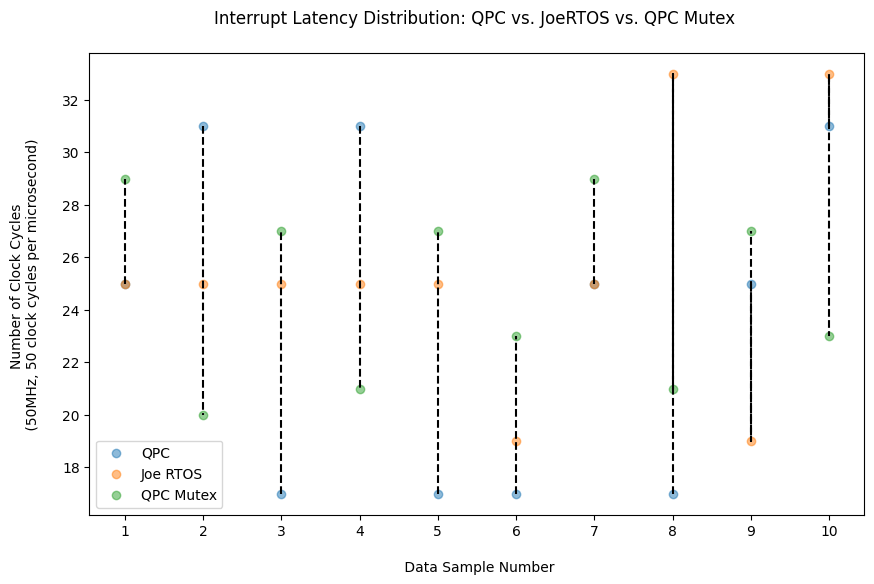

In [5]:

#### Interrupt Latency Scatterplot: QPC, Miros, QPC Mutex

# Read data from CSV files
qpc_data = pd.read_csv('qpc.csv')
freertos_data = pd.read_csv('miros.csv')
qpc_mutex_data = pd.read_csv('qpc_mutex.csv')


# Extract the interrupt latency values
qpc_latency = qpc_data['int_lat']
miros_latency = freertos_data['int_lat']
qpc_mutex_latency = qpc_mutex_data['int_lat']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for QPC
qpc_points = ax.scatter(range(1, len(qpc_latency) + 1), qpc_latency, alpha=0.5, label='QPC')

# Plot the scatter points for Miros
miros_points = ax.scatter(range(1, len(miros_latency) + 1), miros_latency, alpha=0.5, label='Joe RTOS')

# Plot the scatter points for QPC_MUTEX
qpc_points = ax.scatter(range(1, len(qpc_mutex_latency) + 1), qpc_mutex_latency, alpha=0.5, label='QPC Mutex')

# Add vertical lines between the data points
for i in range(len(qpc_latency)):
    x = i + 1
    y1 = qpc_latency[i]
    y2 = miros_latency[i]
    y3 = qpc_mutex_latency[i]
    ax.plot([x, x, x], [y1, y2, y3], 'k--')

# Set the x and y-axis labels
ax.set_xlabel('\n Data Sample Number')
ax.set_ylabel('Number of Clock Cycles \n (50MHz, 50 clock cycles per microsecond) \n')

# Set the x-axis tick labels
ax.set_xticks(range(1, max(len(qpc_latency), len(miros_latency)) + 1))

# Add a legend
ax.legend()

# Add a title
ax.set_title('Interrupt Latency Distribution: QPC vs. JoeRTOS vs. QPC Mutex \n')

# Display the plot
plt.show()

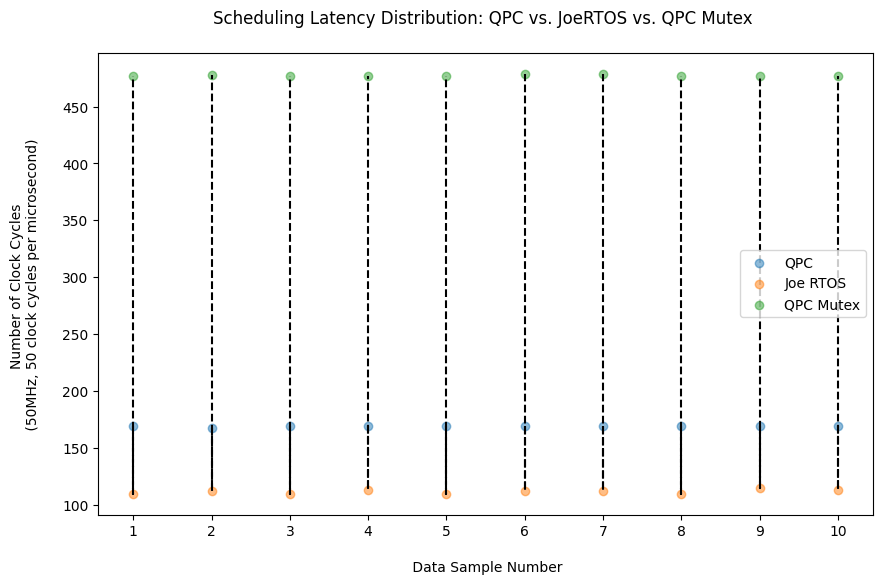

In [6]:

#### Scheduling Latency Scatterplot: QPC, Miros, QPC Mutex

# Read data from CSV files
qpc_data = pd.read_csv('qpc.csv')
freertos_data = pd.read_csv('miros.csv')
qpc_mutex_data = pd.read_csv('qpc_mutex.csv')


# Extract the interrupt latency values
qpc_latency = qpc_data['sched']
miros_latency = freertos_data['sched']
qpc_mutex_latency = qpc_mutex_data['sched']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for QPC
qpc_points = ax.scatter(range(1, len(qpc_latency) + 1), qpc_latency, alpha=0.5, label='QPC')

# Plot the scatter points for Miros
miros_points = ax.scatter(range(1, len(miros_latency) + 1), miros_latency, alpha=0.5, label='Joe RTOS')

# Plot the scatter points for QPC_MUTEX
qpc_points = ax.scatter(range(1, len(qpc_mutex_latency) + 1), qpc_mutex_latency, alpha=0.5, label='QPC Mutex')

# Add vertical lines between the data points
for i in range(len(qpc_latency)):
    x = i + 1
    y1 = qpc_latency[i]
    y2 = miros_latency[i]
    y3 = qpc_mutex_latency[i]
    ax.plot([x, x, x], [y1, y2, y3], 'k--')

# Set the x and y-axis labels
ax.set_xlabel('\n Data Sample Number')
ax.set_ylabel('Number of Clock Cycles \n (50MHz, 50 clock cycles per microsecond) \n')

# Set the x-axis tick labels
ax.set_xticks(range(1, max(len(qpc_latency), len(miros_latency)) + 1))

# Add a legend
ax.legend()

# Add a title
ax.set_title('Scheduling Latency Distribution: QPC vs. JoeRTOS vs. QPC Mutex \n')

# Display the plot
plt.show()

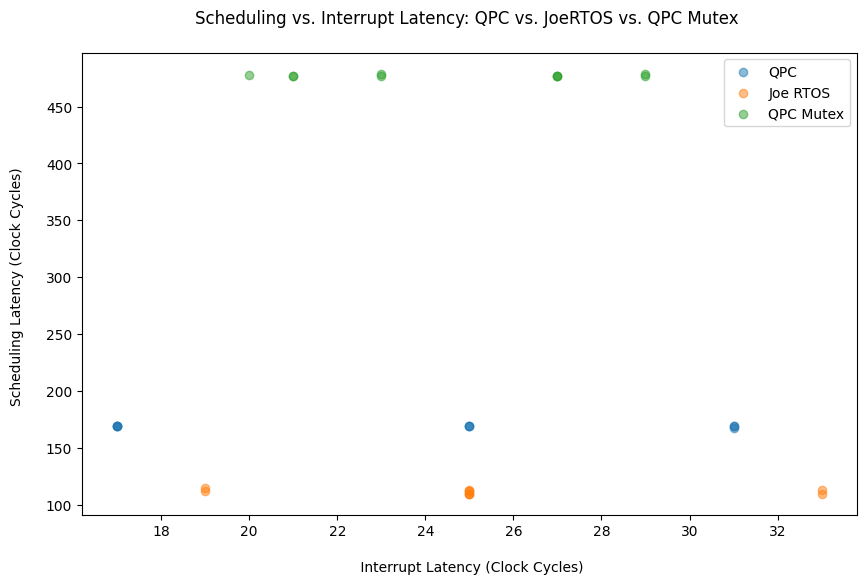

In [7]:

#### Interrupt Latency vs. Scheduling Latency: QPC, Miros, QPC Mutex

# Read data from CSV files
qpc_data = pd.read_csv('qpc.csv')
miros_data = pd.read_csv('miros.csv')
qpc_mutex_data = pd.read_csv('qpc_mutex.csv')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for QPC
qpc_scatter = ax.scatter(qpc_data['int_lat'], qpc_data['sched'], alpha=0.5, label='QPC')

# Plot the scatter points for FreeRTOS
miros_scatter = ax.scatter(miros_data['int_lat'], miros_data['sched'], alpha=0.5, label='Joe RTOS')

# Plot the scatter points for QPC_MUTEX
rtos2_scatter = ax.scatter(qpc_mutex_data['int_lat'], qpc_mutex_data['sched'], alpha=0.5, label='QPC Mutex')

# Set the x and y-axis labels
ax.set_xlabel('\n Interrupt Latency (Clock Cycles)')
ax.set_ylabel('Scheduling Latency (Clock Cycles) \n')

# Add a legend
ax.legend()

# Add a title
ax.set_title('Scheduling vs. Interrupt Latency: QPC vs. JoeRTOS vs. QPC Mutex \n')

# Display the plot
plt.show()